# Displays CALCLENS lensplanes

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import math
from ipywidgets import *
from IPython.display import display
from astropy.table import Table, Column
import h5py
import os

In [3]:
particle = np.dtype([('id',np.uint32),('x',np.float32),('y',np.float32),('z',np.float32),         
                    ('vx',np.float32),('vy',np.float32),('vz',np.float32),
                    ('ra',np.float32),('dec',np.float32),('zred',np.float32)])

In [4]:
 def print_attrs(name, obj):
    print (name)
    if isinstance(obj, h5py.Dataset):
        print("This is a dataset")
         # node is a dataset
    else:
         # node is a group
        print("This is a group")

In [5]:
fpath = '/cosma6/data/dp004/dc-boot5/lensplanes/FullSky/'

fname = 'lensplane_L3Gpc{:04d}.h5'.format(20) 
f = h5py.File(fpath+fname, 'r')
order = f['HEALPixOrder'][0]
nside = hp.order2nside(order)
npix = hp.nside2npix(nside);
print(order,nside, npix)

3 8 768


In [6]:
# set resolution
nside = 128
npix = hp.nside2npix(nside);
# initialise map arrays
m = np.full((50,npix), 1e-6) #fill with small dummy value to ensure that log plot works

In [7]:
planes = [4,9,20,25,33,48]

In [8]:
fpath = '/cosma6/data/dp004/dc-boot5/lensplanes/FullSky/'
for plane in planes:
    fname = 'lensplane_L3Gpc{:04d}.h5'.format(plane) 
    f = h5py.File(fpath+fname, 'r')

    tab = [k for k in f.keys() if 'PeanoInd' in k]
    #print(f.keys())
    for t in tab:
        ds = f[t]
        #print(t, ds.size)
        p = hp.vec2pix(nside,ds['px'], ds['py'], ds['pz'])
        for i in p:
            m[plane][i] += 1
    hp.write_map('Lens_map_{}_{:04d}'.format(nside, plane),m[plane],overwrite=True)    
    print('Finished building healpix map for lensplane', plane)

Finished building healpix map for lensplane 4
Finished building healpix map for lensplane 9
Finished building healpix map for lensplane 20
Finished building healpix map for lensplane 25
Finished building healpix map for lensplane 33
Finished building healpix map for lensplane 48


In [45]:
for plane in planes:
    m[plane] =  hp.read_map('Lens_map_{0}_{1:04d}'.format(nside, plane))

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


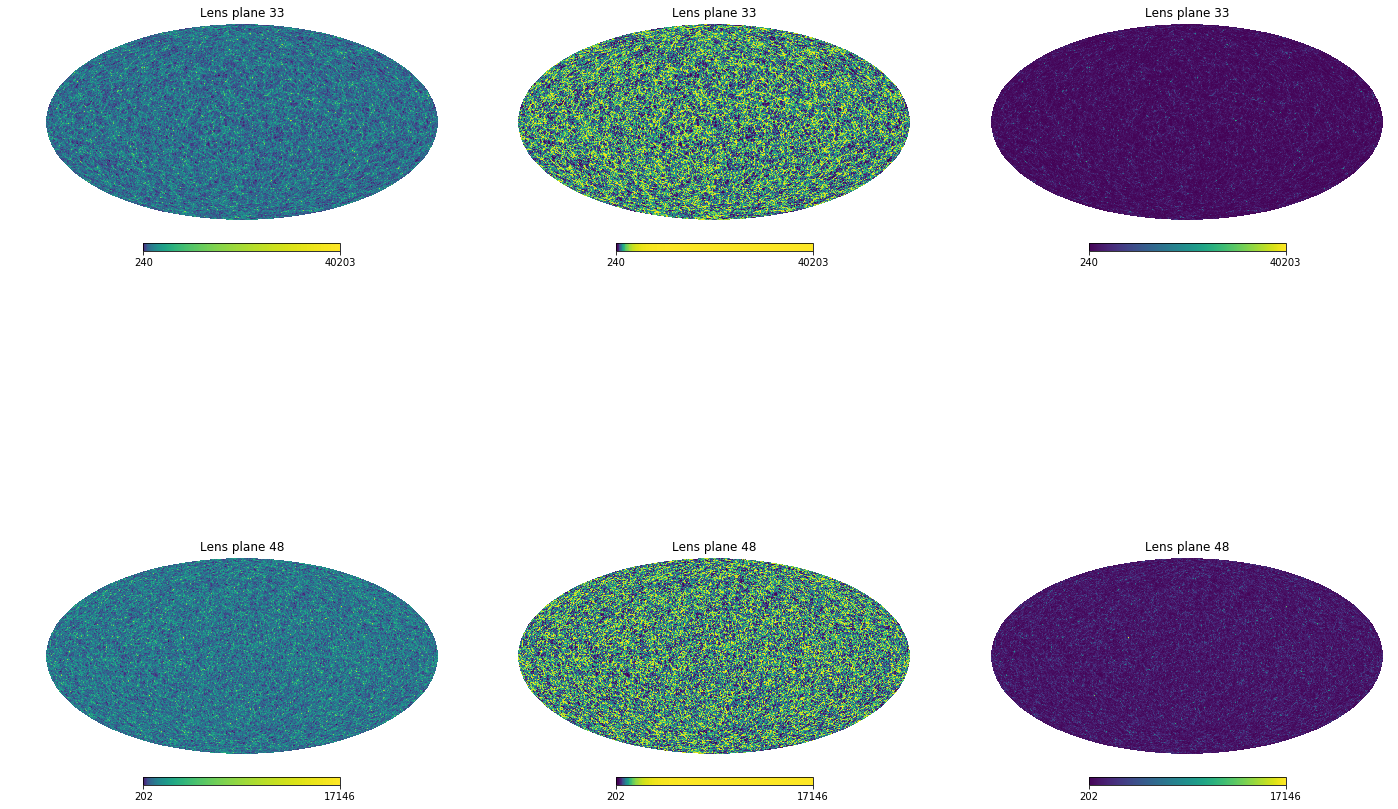

In [53]:
planes2 =  [4,9,20,33,48]
type = ['log', 'hist', 'None']

fig, axs = plt.subplots(len(planes2),3, figsize=(24,24))

for i, pl in enumerate(planes2):
    for j, tp in enumerate(type):  
        plt.sca(axs[i,j])
        hp.mollview(m[pl], norm =tp, title = 'Lens plane {:02d}'.format(pl), hold=True, xsize = 1200)


In [1]:
fig, axs = plt.subplots(2,2, figsize=(18,10))
snaps = ([5, 20, 32, 48])
ax = 0
for k in snaps:
    m0 =  hp.read_map('Lens_map_{0}_{1:04d}'.format(nside, k))
    m = hp.ud_grade(m0,256)
    plt.axes(axs[ax//2,ax%2])
    hp.mollview(m, norm = 'hist', title = 'Lens plane {0:0d}'.format(k), hold=True, cbar = False, xsize = 1200)
    ax+=1
plt.savefig('lens_planes_calclens.pdf', format = 'pdf')

NameError: name 'plt' is not defined

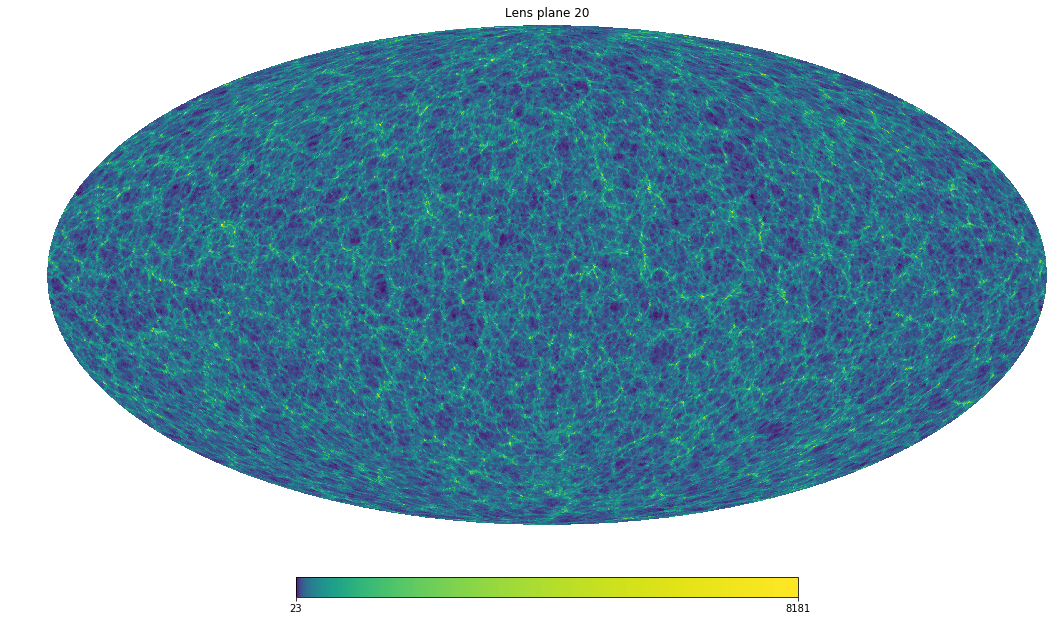

In [42]:
fig, ax = plt.subplots(1,1, figsize=(18,18))

plt.sca(ax)
hp.mollview(m[20], norm = 'log', title = 'Lens plane 20', hold=True, xsize = 3600)

In [76]:
#cl = np.zeros(50, nside)
cl04 = hp.anafast(m[4])
#cl20 = hp.anafast(m20)
#cl32 = hp.anafast(m32)
#cl48 = hp.anafast(m48)
ell = np.arange(len(cl04))

In [77]:
len(cl04)

384

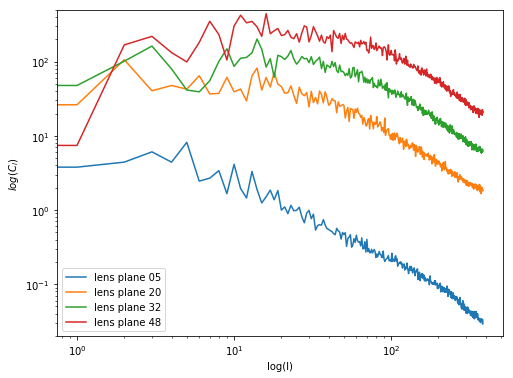

In [192]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.loglog(ell, cl05, label = 'lens plane 05')
ax.loglog(ell, cl20, label = 'lens plane 20')
ax.loglog(ell, cl32, label = 'lens plane 32')
ax.loglog(ell, cl48, label = 'lens plane 48')
ax.set_xlabel('log(l)')
ax.set_ylabel('$log(C_l)$')
ax.legend()
ax.set_ylim(0.02, 500)
plt.show()

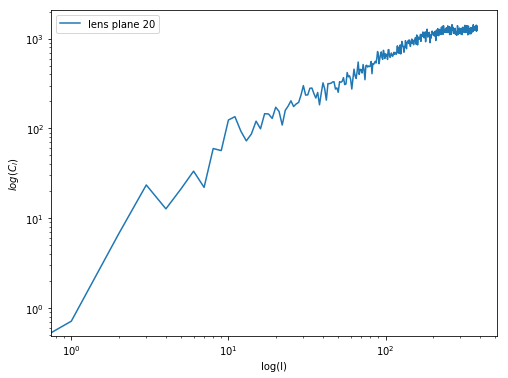

In [80]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
#ax.loglog(ell, cl05, label = 'lens plane 05')
ax.loglog(ell, cl04 * ell * (ell+1) /(2*np.pi), label = 'lens plane 20')
#ax.loglog(ell, cl32, label = 'lens plane 32')
#ax.loglog(ell, cl48, label = 'lens plane 48')
ax.set_xlabel('log(l)')
ax.set_ylabel('$log(C_l)$')
ax.legend()
#ax.set_ylim(0.02, 500)
plt.show()

In [2]:
2286/0.68

3361.7647058823527